In [15]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/sajal-dei/Income-Prediction/main/data/train.csv")
data.to_csv("train.csv", index=False, mode="w")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [8]:
data.fillna("Unknown", inplace=True)
data.drop(data[(data["native-country"] == "Unknown") & (data["workclass"] == "Unknown")].index, inplace=True)

In [27]:
data.rename(columns={"income_>50K": "income"}, inplace=True)

In [17]:
categorical_columns = data.select_dtypes(include="object").columns
categorical_codes_columns = list(map(lambda x: x+"_codes", categorical_columns))

In [11]:
data[categorical_codes_columns] = data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

In [12]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,workclass_codes,education_codes,marital-status_codes,occupation_codes,relationship_codes,race_codes,gender_codes,native-country_codes
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,3,10,0,3,1,4,1,38
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,3,2,4,7,3,4,1,38
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,3,9,2,3,0,4,1,38
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,6,5,2,13,0,4,1,38
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,6,15,4,7,1,2,1,38


# Visualizing the data

In [14]:
rcParams['figure.figsize'] = "20, 12"

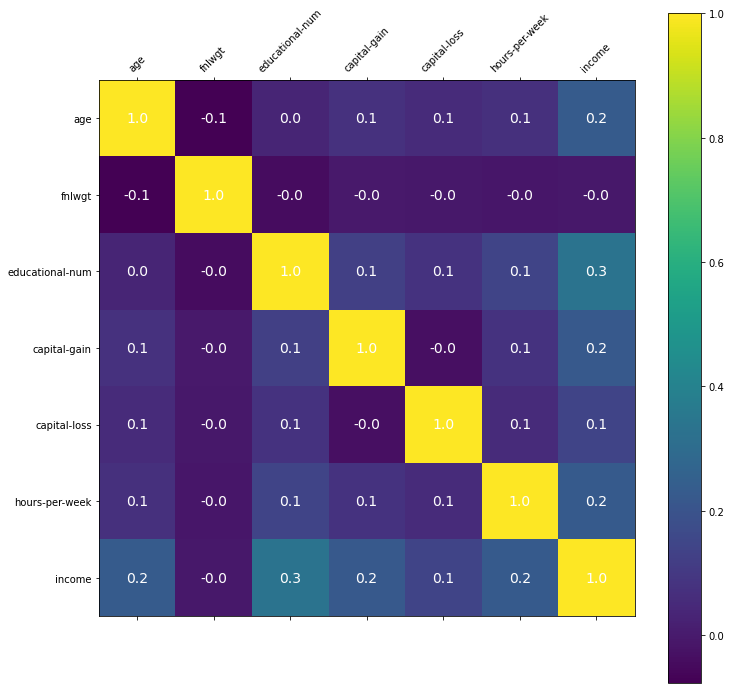

In [28]:
corr = data[data.columns.drop(categorical_codes_columns)].corr()
plt.matshow(corr)
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns.values, rotation = 45) 
plt.yticks(np.arange(len(corr.columns)), corr.columns.values) 
for (i, j), corr in np.ndenumerate(corr):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

# Inference
* There is a no correlation between fnlweight and any other feature. So, dropping this column.

In [30]:
data.drop(columns="fnlwgt", inplace=True)

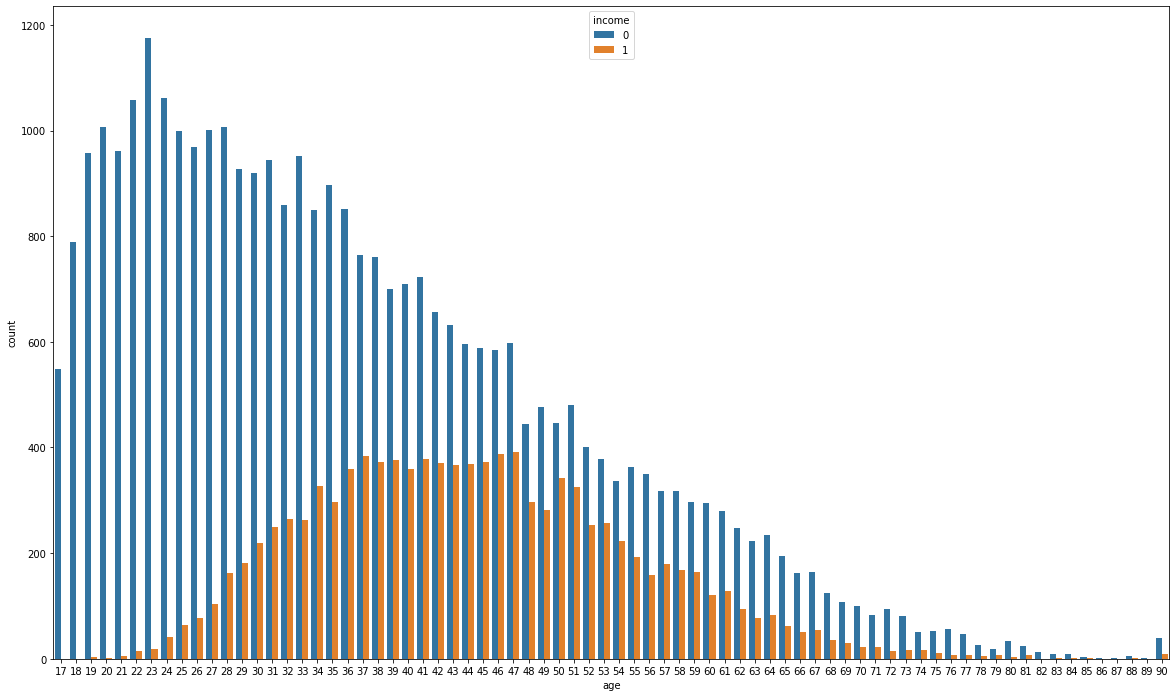

In [31]:
# Checking for age column
sns.countplot(x='age', hue='income', data=data)

# Inference

* Income > 50k is somewhat normal distribution
* Income < 50k is positively skewed.

* Age < 24 has maximum people with income < 50k
* Otherwise people have mixed incomes
* People in 20-30s have a more chance of having income < 50k

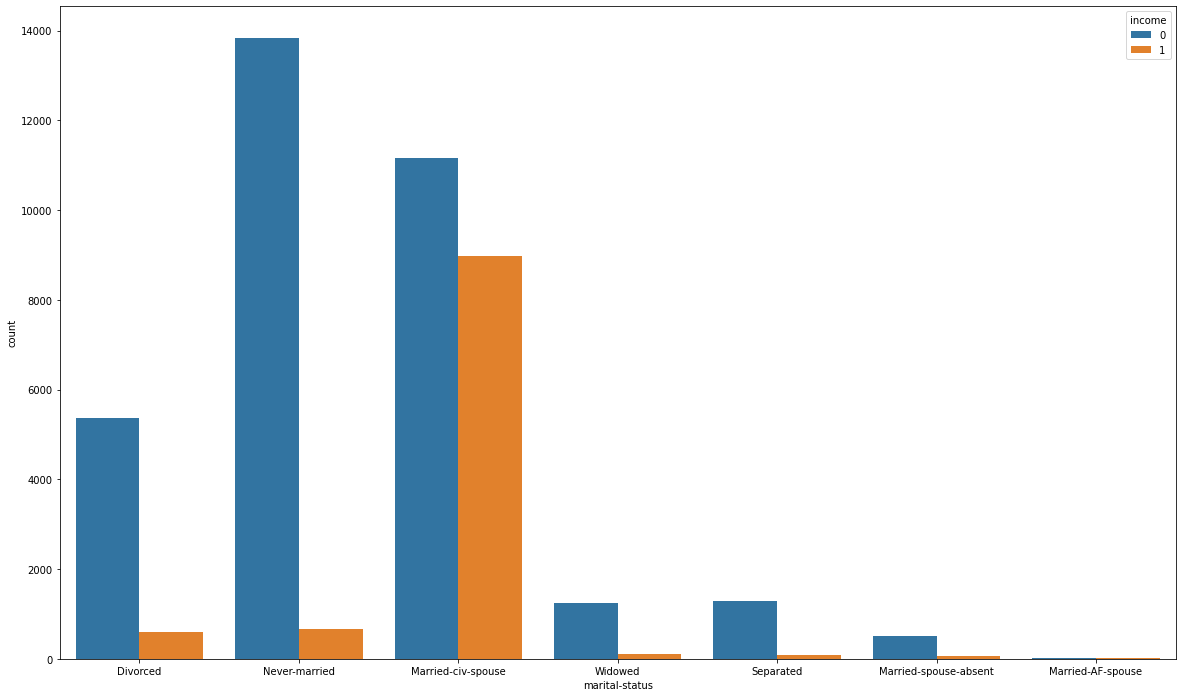

In [32]:
# For Marital Status
sns.countplot(x='marital-status', hue='income', data=data)

# Inference

* Married People has more chance of having income > 50k

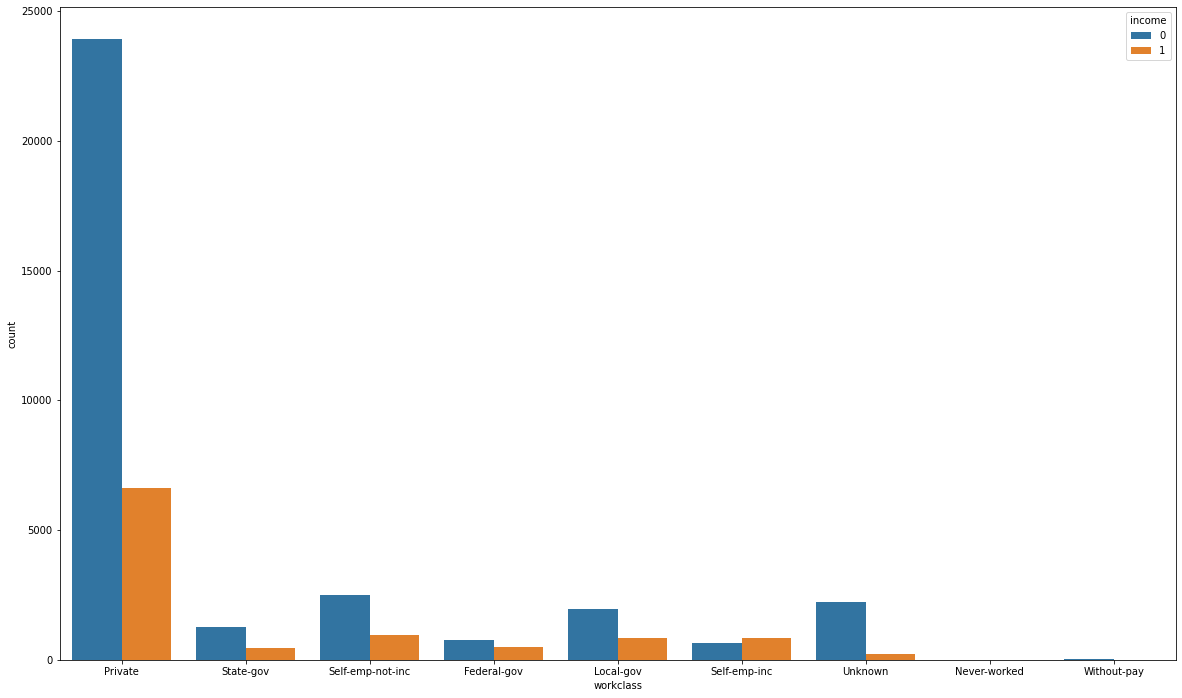

In [47]:
# Work-class
sns.countplot(x="workclass", hue="income", data=data)

# Inference

* Never-Worked, Without-pay and unknown doesn't say much about the data and we can drop these, if we need.

In [48]:
data[categorical_columns] = data[categorical_columns].astype('category').apply(lambda x: x.cat.codes)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,3,10,16,0,3,1,4,1,99999,0,60,38,1
1,17,3,2,8,4,7,3,4,1,0,0,15,38,0
2,31,3,9,13,2,3,0,4,1,0,0,40,38,1
3,58,6,5,4,2,13,0,4,1,0,0,40,38,0
4,25,6,15,10,4,7,1,2,1,0,0,40,38,0


# Create Train Data for Classification

In [49]:
x = data.drop(columns="income")
y = data["income"]

In [50]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=24, verbose=0,
                       warm_start=False)

In [51]:
test = pd.read_csv("https://raw.githubusercontent.com/sajal-dei/Income-Prediction/main/data/test.csv")
test.to_csv("test.csv", index=False, mode="w")
test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,Self-emp-not-inc,327120,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Portugal
1,32,Private,123253,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,42,United-States
2,47,Private,232628,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,40,United-States
3,19,Private,374262,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States
4,46,Self-emp-not-inc,311231,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States


In [62]:
test[categorical_columns] = test[categorical_columns].astype('category').apply(lambda x: x.cat.codes)
test.drop(columns="fnlwgt", inplace=True)

In [68]:
test_pred = clf.predict(test)
final = pd.DataFrame(data={"outcome": test_pred}).reset_index()
final.rename(columns={"index": "id"}, inplace=True)
final.to_csv("test.txt", index=False)
final

,id,outcome
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
894,894,0
895,895,0
896,896,0
897,897,1
